In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_path = 'Super_Store_data.csv'
data = pd.read_csv(file_path, encoding='latin1')  
print("Initial Data:")
print(data.head())


Initial Data:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region   

In [3]:
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [4]:
print(data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [5]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
date_column = 'Order Date'  


C:\Users\jaipr\AppData\Local\Temp\ipykernel_30676\3091897467.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\jaipr\AppData\Local\Temp\ipykernel_30676\3091897467.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [6]:
data[date_column] = pd.to_datetime(data[date_column], errors='coerce')
data = data.dropna(subset=[date_column])
data.set_index(date_column, inplace=True)
data.sort_index(inplace=True)
print("\nCleaned Data:")
print(data.head())



Cleaned Data:
            Row ID        Order ID  Ship Date       Ship Mode Customer ID  \
Order Date                                                                  
2014-01-06    7475  CA-2014-167199  1/10/2014  Standard Class    ME-17320   
2014-01-07    7661  CA-2014-105417  1/12/2014  Standard Class    VS-21820   
2014-01-10     867  CA-2014-149020  1/15/2014  Standard Class    AJ-10780   
2014-01-11     717  CA-2014-130092  1/14/2014     First Class    SV-20365   
2014-01-13    2979  CA-2014-109232  1/16/2014    Second Class    ND-18370   

                Customer Name      Segment        Country            City  \
Order Date                                                                  
2014-01-06      Maria Etezadi  Home Office  United States       Henderson   
2014-01-07   Vivek Sundaresam     Consumer  United States      Huntsville   
2014-01-10     Anthony Jacobs    Corporate  United States     Springfield   
2014-01-11        Seth Vernon     Consumer  United States   

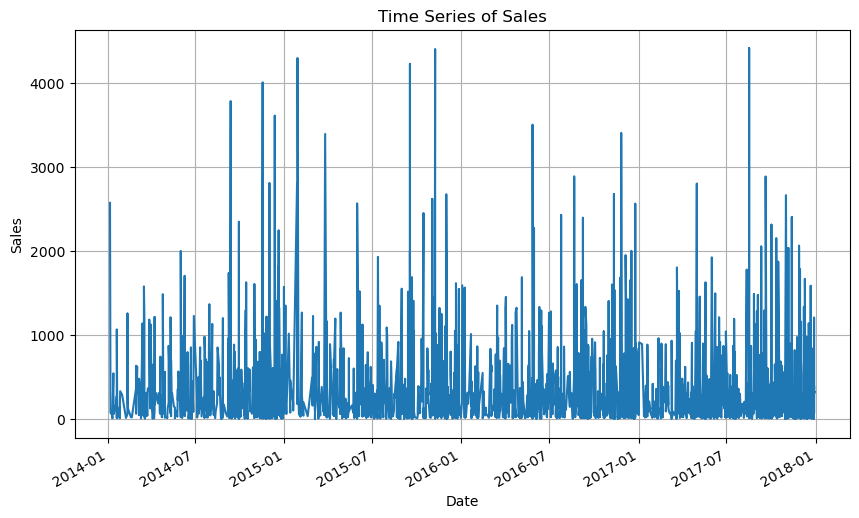

In [7]:
numerical_column = 'Sales'  
if numerical_column in data.columns:
    plt.figure(figsize=(10, 6))
    data[numerical_column].plot()
    plt.title(f'Time Series of {numerical_column}')
    plt.xlabel('Date')
    plt.ylabel(numerical_column)
    plt.grid()
    plt.show()
